# K-means

In [66]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')


In [21]:
#Cargamos el dataset 
Datos = pd.read_csv('Mall_Customers.csv')

In [22]:
# Realizamos la lectura de los datos para el analñisis exploratorio 
Datos.head(40)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [23]:
# mirar el tamaño del data set 
dataset.shape

(200, 5)

In [34]:
# Remplazamos los datos de gender por 0(Female) y 1(Male)
Datos['Gender'] = Datos['Gender'].replace({'Female': 0, 'Male': 1})


In [35]:
Datos.head(40)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76
6,7,0,35,18,6
7,8,0,23,18,94
8,9,1,64,19,3
9,10,0,30,19,72


In [25]:
# Descripcion de los datos 
Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos')

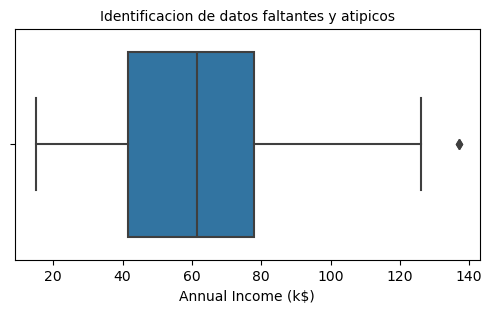

In [27]:
# Identificacion de los datos faltantes y atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title('Identificacion de datos faltantes y atipicos', fontsize=10)

# 2. Preprocesar los datos limpiandolos, tratando valores faltantes y transformandolos según sea necesario

In [28]:
# Revision de datos faltantes 
print("Cantidad de registros con 0 en Edad: ",Datos['Age'].isin([0]).sum())
print("Cantidad de registros con 0 en Salario: ",Datos['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de registros con 0 en Data Credito: ",Datos['Spending Score (1-100)'].isin([0]).sum())

Cantidad de registros con 0 en Edad:  0
Cantidad de registros con 0 en Salario:  0
Cantidad de registros con 0 en Data Credito:  0


Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos')

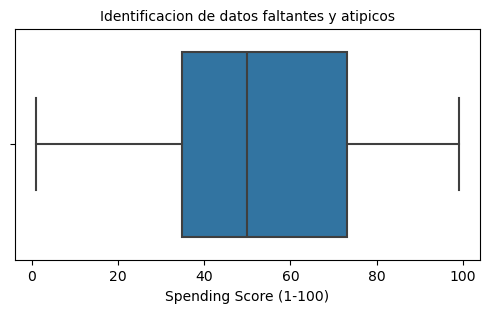

In [30]:
# Identificacion de datos atipicos para puntuacion de gastos 
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Spending Score (1-100)'])
plt.title('Identificacion de datos faltantes y atipicos', fontsize=10)


In [40]:
#Conteo de datos atipicos 
nivel_minimo=0
nivel_maximo=100
Total_atipicos=((Datos['Spending Score (1-100)']<nivel_minimo)|(Datos['Spending Score (1-100)']>nivel_maximo)).sum()
print ("El total de datos atipicos es {}".format(Total_atipicos))

El total de datos atipicos es 0


In [42]:
# Filtrar Datos Atipicos 
Datos=Datos[((Datos['Spending Score (1-100)']<nivel_maximo)&(Datos['Spending Score (1-100)']>nivel_minimo))]

In [43]:
# revision de tipo de datos y datos faltantes 
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


"""
# 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

Características de interés para el agrupamiento:
- Annual Income
- Spending Score
"""e
"""

In [47]:
# Filtar las columnas del modelo 
Datos =Datos[["Gender","Spending Score (1-100)","Annual Income (k$)"]]

In [48]:
# Revision de los datos de las variables objetivo 
Datos.head(10)

,Gender,Spending Score (1-100),Annual Income (k$)
0,1,39,15
1,1,81,15
2,0,6,16
3,0,77,16
4,0,40,17
5,0,76,17
6,0,6,18
7,0,94,18
8,1,3,19
9,0,72,19


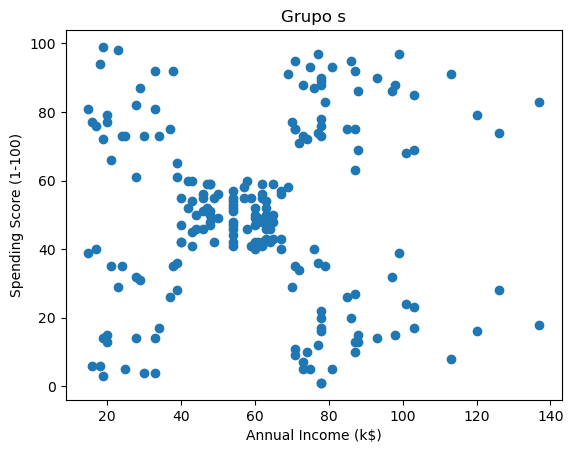

In [54]:
# Grafica Antes del Agrupamiento 
plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Grupo s')
plt.show()


# 4. Configuarar el modelo configurando los diferentes Hiperparametros


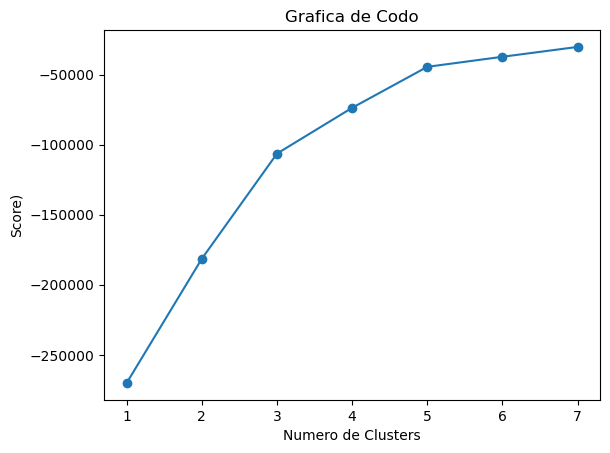

In [52]:
# Se realiza la grafica con cada identificado Valor de K 

Nc=range(1,8)
kmeans = [KMeans(n_clusters=i)for i in Nc]
kmeans
score = [kmeans [i].fit(Datos).score(Datos)for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Numero de Clusters')
plt.ylabel('Score)')
plt.title('Grafica de Codo')
plt.show()


In [53]:
#Generacion del modelo de agrupamiento del modelo es k=6 (Es decir haremos 6 grupos de agrupamiento )
Modelo = KMeans(n_clusters=6,random_state=0)
Modelo.fit(Datos)

KMeans(n_clusters=6, random_state=0)

In [63]:
# Se agrega la columna grupo a la BD para identificar el numero del grupo de agrupamiento
Modelo.labels_
Datos["Grupo"]=Modelo.labels_
print(Datos)

     Gender  Spending Score (1-100)  Annual Income (k$)  Grupo  \
0         1                      39                  15      4   
1         1                      81                  15      3   
2         0                       6                  16      4   
3         0                      77                  16      3   
4         0                      40                  17      4   
..      ...                     ...                 ...    ...   
195       0                      79                 120      2   
196       0                      28                 126      0   
197       1                      74                 126      2   
198       1                      18                 137      0   
199       1                      83                 137      2   

     Distribucion Cluster  Grupos  
0                       4       4  
1                       3       3  
2                       4       4  
3                       3       3  
4                       4  

# 5. Evaluar el desempeño del modelo con metricas como Caoeficiente de Silhouette, Indice de Calinski-Harabasz 


In [67]:
# Desempeño del modelo con el coeficiente de Silhouette el inidce de Calinski- Harabasz y el indice de davies Boulding score 
# Preparacion de la metrica de la columna grupo 
Observaciones = len(Datos)
X = Datos.drop('Grupo', axis=1)
clusters = Datos['Grupo']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Creamos tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente de Silhouette", sil_score],
    ["Indice de Calinski-Harabasz", calinski_score],
    ["Indice de Davies-Bouldin", davies_score],
]

# Imprimir la tabla
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))  





+-----------------------------+--------------------+
|           Metric            |       Value        |
+-----------------------------+--------------------+
|   Numero de Observaciones   |        200         |
|  Coeficiente de Silhouette  | 0.5409881412126798 |
| Indice de Calinski-Harabasz | 243.2005600441525  |
|  Indice de Davies-Bouldin   | 0.6555190409561708 |
+-----------------------------+--------------------+


# 6. Realizar las diferentes graficas que permitan visualizar los resultados del modelo 

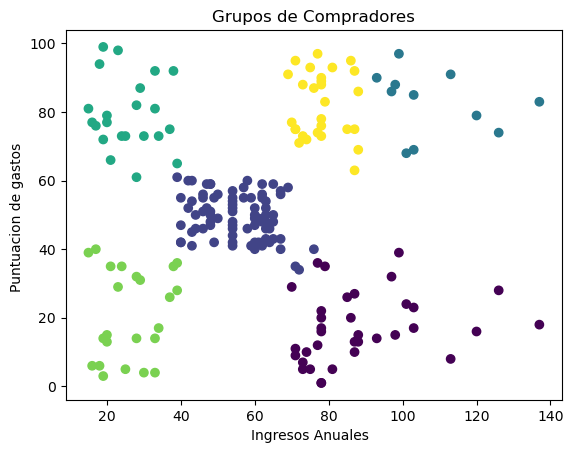

In [69]:
plt.scatter(Datos['Annual Income (k$)'],Datos['Spending Score (1-100)'],c=Datos['Grupo'],cmap='viridis')
plt.xlabel('Ingresos Anuales  ')
plt.ylabel('Puntuacion de gastos ')
plt.title('Grupos de Compradores')
plt.show()


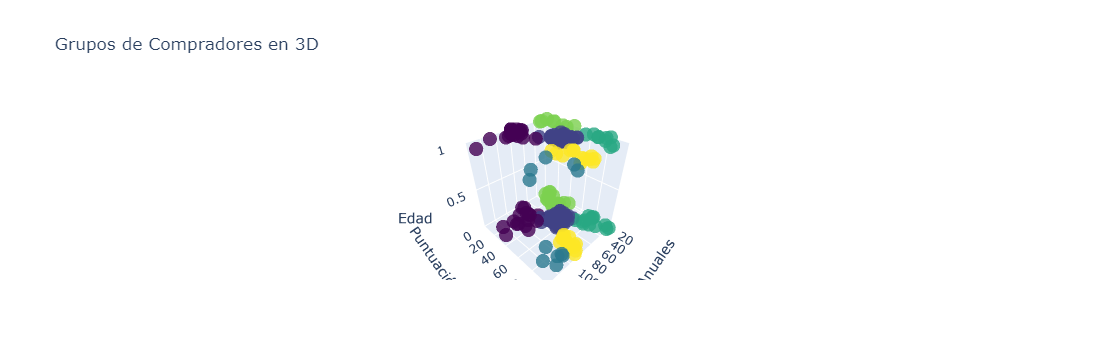

In [73]:
# Crear la figura
fig = go.Figure()

# Añadir un gráfico de dispersión 3D
fig.add_trace(go.Scatter3d(
    x=Datos['Annual Income (k$)'],
    y=Datos['Spending Score (1-100)'],
    z=Datos['Gender'],  # Esto añade la edad al eje Z
    mode='markers',
    marker=dict(
        size=8,
        color=Datos['Grupo'],  # Colorea los puntos según el grupo
        colorscale='viridis',  # Utiliza la misma escala de color que en el gráfico 2D
        opacity=0.8
    )
))

# Añadir etiquetas de ejes y título
fig.update_layout(
    scene=dict(
        xaxis=dict(title='Ingresos Anuales', range=[min(Datos['Annual Income (k$)']), max(Datos['Annual Income (k$)'])]),
        yaxis=dict(title='Puntuación de Gastos', range=[min(Datos['Spending Score (1-100)']), max(Datos['Spending Score (1-100)'])]),
        zaxis=dict(title='Edad', range=[min(Datos['Gender']), max(Datos['Gender'])])
    ),
    title='Grupos de Compradores en 3D'
)

# Mostrar el gráfico
fig.show()










